In [1]:
%load_ext autoreload
%autoreload 2
import itertools
import math
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolTransforms
import py_rdl
import RA

In [9]:
data = pd.read_csv("data/cyclic_peptide_2.csv")

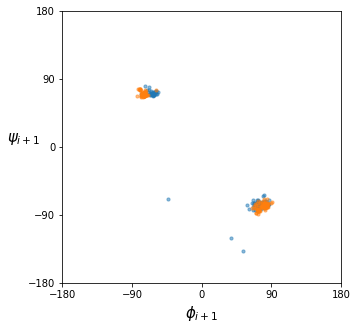

In [2]:
# Phi-Psi (Gamma Turns)
tttc_phi_psi = pd.read_csv("tttc_phi_psi.csv")
tttt_phi_psi = pd.read_csv("tttt_phi_psi.csv")

plt.figure(figsize=(5,5))
plt.scatter(tttc_phi_psi.iloc[:,0],tttc_phi_psi.iloc[:,1],label="TTTC",
            s=10,alpha=0.5)
plt.scatter(tttt_phi_psi.iloc[:,0],tttt_phi_psi.iloc[:,1],label="TTTT",
            s=10,alpha=0.5)
plt.xlim(-180,180)
plt.ylim(-180,180)
plt.xticks([-180,-90,0,90,180])
plt.yticks([-180,-90,0,90,180])
plt.xlabel(r"$\phi_{i+1}$",size=15)
plt.ylabel(r"$\psi_{i+1}$",size=15, rotation=0)
plt.savefig("gamma-turns-phi-psi.pdf",dpi=150, bbox_inches="tight")
plt.show()

In [11]:
tttt = []
tttc = []
ttcc = []
tctc = []
tccc = []
cccc = []
for idx, item in enumerate(data[["P1","P2","P3","P4"]].values):
    if item.tolist()==["T","T","T","T"]:
        tttt.append(idx)
    elif item.tolist() in [["T","T","T","C"],["T","T","C","T"],["T","C","T","T"],["C","T","T","T"]]:
        tttc.append(idx)
    elif item.tolist() in [["T","T","C","C"],["T","C","C","T"],["C","C","T","T"]]:
        ttcc.append(idx)
    elif item.tolist() in [["T","C","T","C"],["C","T","C","T"]]:
        tctc.append(idx)
    elif item.tolist() in [["C","C","C","T"],["C","C","T","C"],["C","T","C","C"],["T","C","C","C"]]:
        tccc.append(idx)
    else:
        cccc.append(idx)

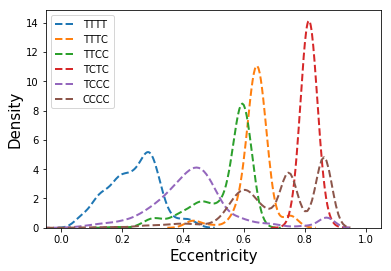

In [13]:
sns.kdeplot(data["Eccentricity"].iloc[tttt],bw=0.025,label="TTTT",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tttc],bw=0.025,label="TTTC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[ttcc],bw=0.025,label="TTCC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tctc],bw=0.025,label="TCTC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[tccc],bw=0.025,label="TCCC",ls="--",lw=2)
sns.kdeplot(data["Eccentricity"].iloc[cccc],bw=0.025,label="CCCC",ls="--",lw=2)
plt.xlim(-0.05,1.05)
plt.ylabel("Density",size=15)
plt.xlabel("Eccentricity",size=15)
plt.savefig("eccentricity.pdf",dpi=150,bbox_inches="tight")
plt.show()

In [68]:
#plt.hist(data.iloc[tttt]["phi4"].tolist()*200,bins=100,alpha=.6,color="r")
#plt.hist(data.iloc[cccc]["phi4"],bins=100,alpha=.6,color="red")
#plt.hist(data.iloc[tccc]["phi4"],bins=100,alpha=.6)
#plt.hist(data.iloc[tctc]["phi4"],bins=150,alpha=.6)
#plt.hist(data.iloc[tttc]["phi4"].tolist()*150,bins=100,alpha=.6)
#plt.hist(data.iloc[ttcc]["phi4"].tolist()*50,bins=100,alpha=.6,color="b")
#plt.vlines(-np.pi+np.deg2rad(80),0,500)
plt.show()

In [ ]:
CCCC,TTCC
TTTT,TCCC
TCTC,TTTC